## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview

In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].unique()
total_mice = len(mice_count)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mice = combined_df.groupby("Mouse ID")
grouped_mice.count()
mice_timepoints_count = pd.DataFrame(grouped_mice[["Mouse ID","Timepoint"]].count())
mice_timepoints_count

,Mouse ID,Timepoint
Mouse ID,,
a203,10,10
a251,10,10
a262,10,10
a275,10,10
a366,7,7
...,...,...
z435,3,3
z578,10,10
z581,10,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# grouped_mice.first()

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [8]:
grouped_regimen = combined_df.groupby("Drug Regimen")
grouped_regimen.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [9]:
mean_regimen = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].mean())
med_regimen = grouped_regimen["Tumor Volume (mm3)"].median()
var_regimen = grouped_regimen["Tumor Volume (mm3)"].var()
sdev_regimen = grouped_regimen["Tumor Volume (mm3)"].std()
sem_regimen = grouped_regimen["Tumor Volume (mm3)"].sem()

In [10]:
regimen_summ1 = mean_regimen.merge(med_regimen, left_index=True, right_index=True)
regimen_summ1 = regimen_summ1.merge(var_regimen, left_index=True, right_index=True)
regimen_summ2 = regimen_summ1.merge(sdev_regimen, left_index=True, right_index=True)
regimen_summary = regimen_summ2.merge(sem_regimen, left_index=True, right_index=True)
regimen_summary.columns = ["TumorVolume_Mean", "TumorVolume_Median", "TumorVolume_Variance", "TumorVolume_StandardDeviation", "TumorVolume_SEM"]
regimen_summary 

,TumorVolume_Mean,TumorVolume_Median,TumorVolume_Variance,TumorVolume_StandardDeviation,TumorVolume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimensummary = grouped_regimen.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
regimensummary

# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
mice_treated = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
mice_treated


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

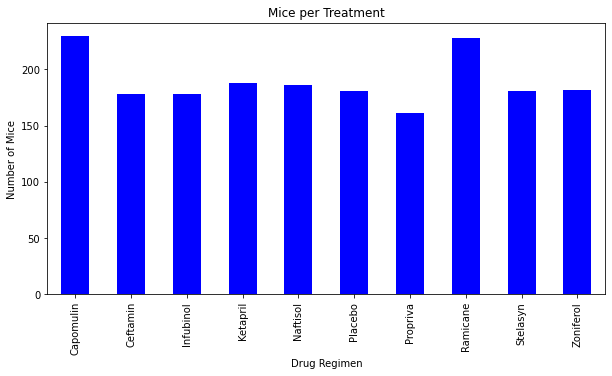

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated.plot(kind="bar", color='b', figsize=(10,5))

#set chart title
plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#show chart and set layout
plt.show()


In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = grouped_regimen["Mouse ID"].count()
x_axis = np.arange(len(mice))
drugs = ["Capomulin", "Ceftamin ", "Infubinol", "Ketapril ", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]


Text(0, 0.5, 'Number of Mice')

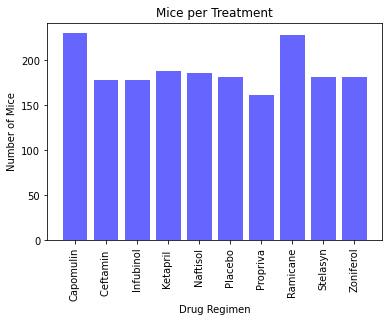

In [15]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.bar(x_axis, mice, color='b', alpha=0.6, align="center")
plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_genders = mouse_metadata.groupby("Sex").count()
mice_genders = grouped_genders["Mouse ID"]
mice_genders

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

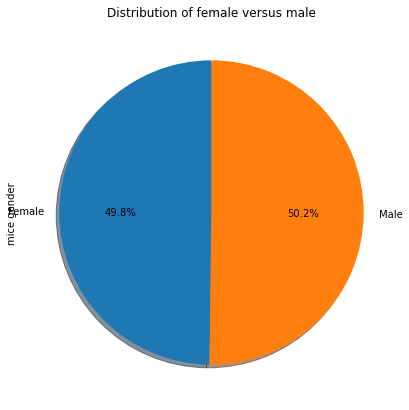

In [54]:
mice_genders.plot(kind="pie", figsize=(10,7), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of female versus male')
plt.ylabel('mice gender')
plt.show()

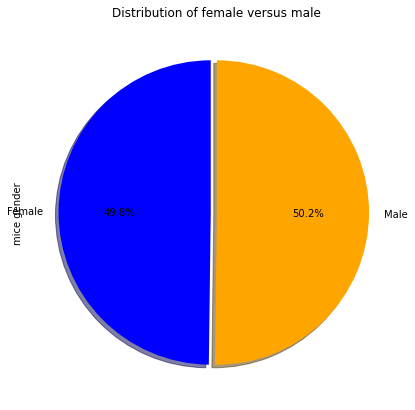

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","orange"]
explode = (0.04, 0)
pyplot_pie = mice_genders.plot.pie(y='sizes', figsize=(10, 7), explode=explode, shadow=True, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title('Distribution of female versus male')
plt.ylabel('mice gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
last_timepoint = combined_df.groupby('Mouse ID').max()[['Timepoint', 'Tumor Volume (mm3)']]
last_timepoint

,Timepoint,Tumor Volume (mm3)
Mouse ID,,
a203,45,67.973419
a251,45,65.525743
a262,45,70.717621
a275,45,62.999356
a366,30,63.440686
...,...,...
z435,10,48.710661
z578,45,45.000000
z581,45,62.754451


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_drugs = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
select_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [99]:
# Start by getting the last (greatest) timepoint for each mouse
grouped_mice = select_drugs.groupby('Mouse ID')
last_timepoint = pd.DataFrame(grouped_mice['Timepoint'].max())
last_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [100]:
last_mice_record = select_drugs.drop_duplicates("Mouse ID", keep='last')
last_mice_record

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [84]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
select_drugs_df = last_mice_record[["Mouse ID", "Drug Regimen", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]
select_drugs_df

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,16,45,22.050126
19,s185,Capomulin,17,45,23.343598
29,x401,Capomulin,15,45,28.484033
39,m601,Capomulin,17,45,28.430964
49,g791,Ramicane,16,45,29.128472
...,...,...,...,...,...
1797,x822,Ceftamin,29,45,61.386660
1813,y163,Infubinol,27,45,67.685569
1845,y769,Ceftamin,27,45,68.594745
1855,y865,Ceftamin,26,45,64.729837


In [24]:
# check if the final values in the output are correct
mousetocheck = combined_df.loc[combined_df["Mouse ID"] == "m601",:]
mousetocheck

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [25]:
select_drugs_df.describe()

,Timepoint,Tumor Volume (mm3)
count,100.000000,100.000000
mean,35.700000,47.197795
std,14.442852,12.953884
min,0.000000,22.050126
25%,30.000000,37.187744
50%,45.000000,45.000000
75%,45.000000,59.930262
max,45.000000,72.226731


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
four_last_tumor = select_drugs_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = four_last_tumor.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(f"The interquartile range is: {iqr}")
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
mice_treatment_tumor = pd.DataFrame(select_drugs_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]])

    # add subset 
a_treat = mice_treatment_tumor.loc[mice_treatment_tumor["Drug Regimen"] == "Capomulin",:]
b_treat = mice_treatment_tumor.loc[mice_treatment_tumor["Drug Regimen"] == "Ramicane",:]
c_treat = mice_treatment_tumor.loc[mice_treatment_tumor["Drug Regimen"] == "Infubinol",:]
d_treat = mice_treatment_tumor.loc[mice_treatment_tumor["Drug Regimen"] == "Ceftamin",:]
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")

The interquartile range is: 22.74251795250001
The lower quartile is: 37.187743802499995
The upper quartile is: 59.930261755000004
Values below 3.0739668737499812 and above 94.04403868375002 could be outliers.


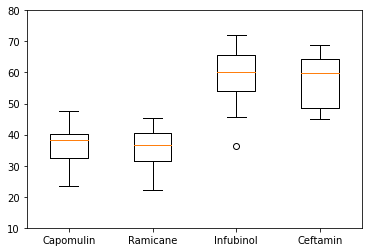

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = mice_treatment_tumor.reset_index()
tumvol_lists = pd.DataFrame(final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list))
tumvols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumvols, labels=treatments)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [131]:
a_treat.head(5)

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
19,s185,Capomulin,17,45,23.343598
29,x401,Capomulin,15,45,28.484033
39,m601,Capomulin,17,45,28.430964
64,f966,Capomulin,17,20,30.485985
104,u364,Capomulin,17,45,31.023923


In [132]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mousefrom_atreat = combined_df.loc[combined_df["Mouse ID"] == "s185",:]
mousefrom_atreat

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [133]:
amouse_timepoint_tumvol = mousefrom_atreat[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
amouse_timepoint_tumvol

,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


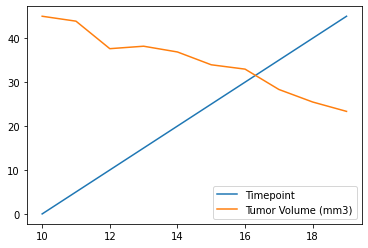

In [134]:
timepointvstumvol = amouse_timepoint_tumvol.plot.line()

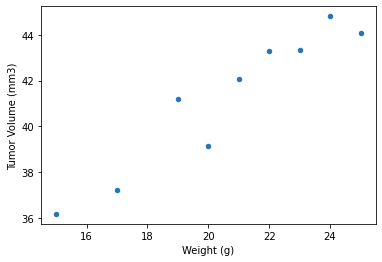

In [123]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
onlycap = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
groupedweight_onlycap = onlycap.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
cap_weight_tumvol = pd.DataFrame(groupedweight_onlycap).reset_index()
weightvstumvol = cap_weight_tumvol.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
weightvstumvol

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
